In [1]:
from scripts.eda import EDA
from scripts.data_cleaning import DataCleaning
from scripts.feature_engineering import FeatureEngineering
from scripts.modelisation import Modelisation

import pandas as pd

In [2]:
eda = EDA()
data_cleaning = DataCleaning()
feature_engineering = FeatureEngineering()
modelisation = Modelisation()

In [3]:
# Convertir le fichier CSV de MacRoman en UTF-8
with open("stores_sales_forecasting.csv", "r", encoding="MacRoman") as f:
    content = f.read()

with open("stores_sales_forecasting.csv", "w", encoding="utf-8") as f:
    f.write(content)

In [4]:
df = pd.read_csv("stores_sales_forecasting.csv")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# EDA

In [6]:
print("\n=== STATISTIQUES ===\n")
print(eda.statistics(df))



=== STATISTIQUES ===

            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


In [7]:
print("\n=== VALEURS MANQUANTES ===\n")
print(eda.missing_values(df))


=== VALEURS MANQUANTES ===

Le dataframe a 0 valeurs manquantes:



In [8]:
print("\n=== VALEURS UNIQUES ===\n")
print(eda.unique_values(df))


=== VALEURS UNIQUES ===




In [9]:
print("\n=== DOUBLONS ===\n")
print(eda.duplicate_rows(df))


=== DOUBLONS ===

Number of duplicate rows: 0



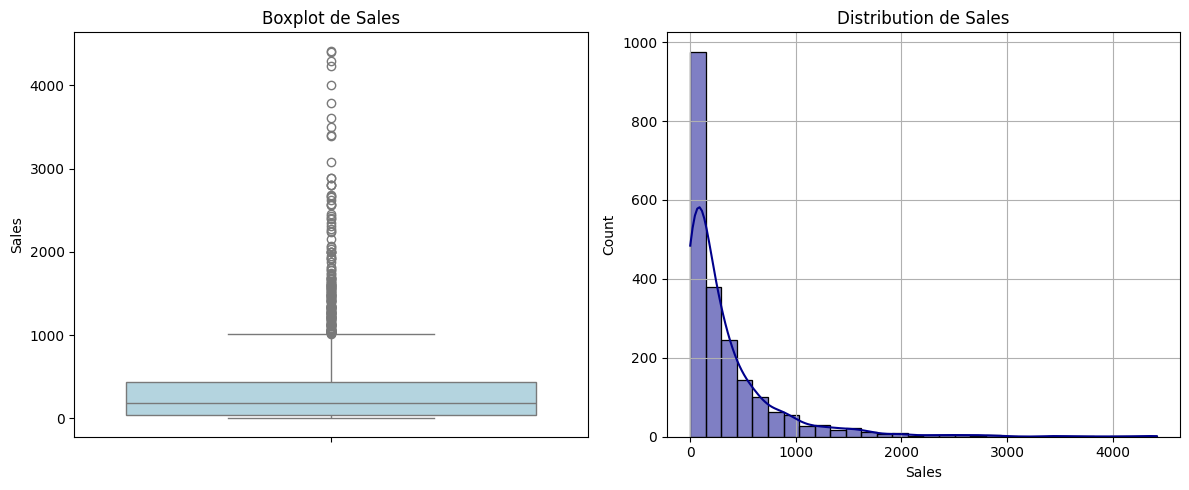

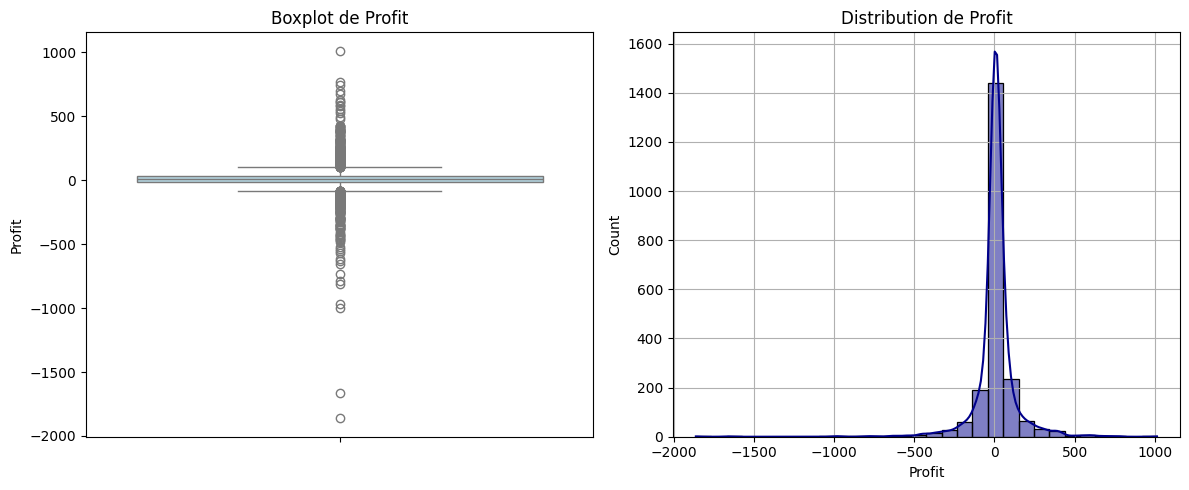

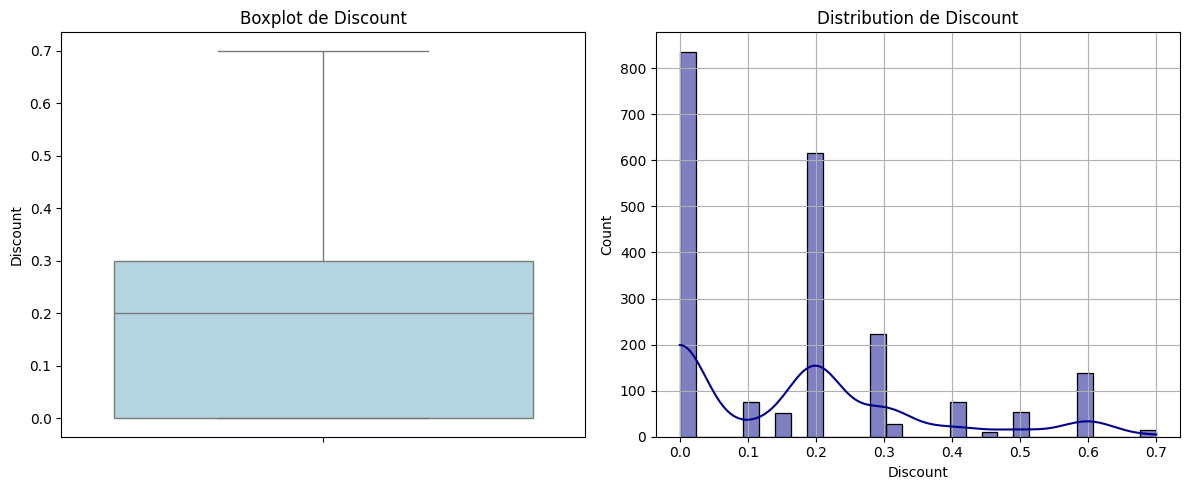

In [10]:
for col in ["Sales", "Profit", "Discount"]:
    eda.plot_distribution(df, col)

On constate que Profit a des valeurs fortement négatives, nous allons par la suite retirer ces outliers (ceux allant au delà de -1000)

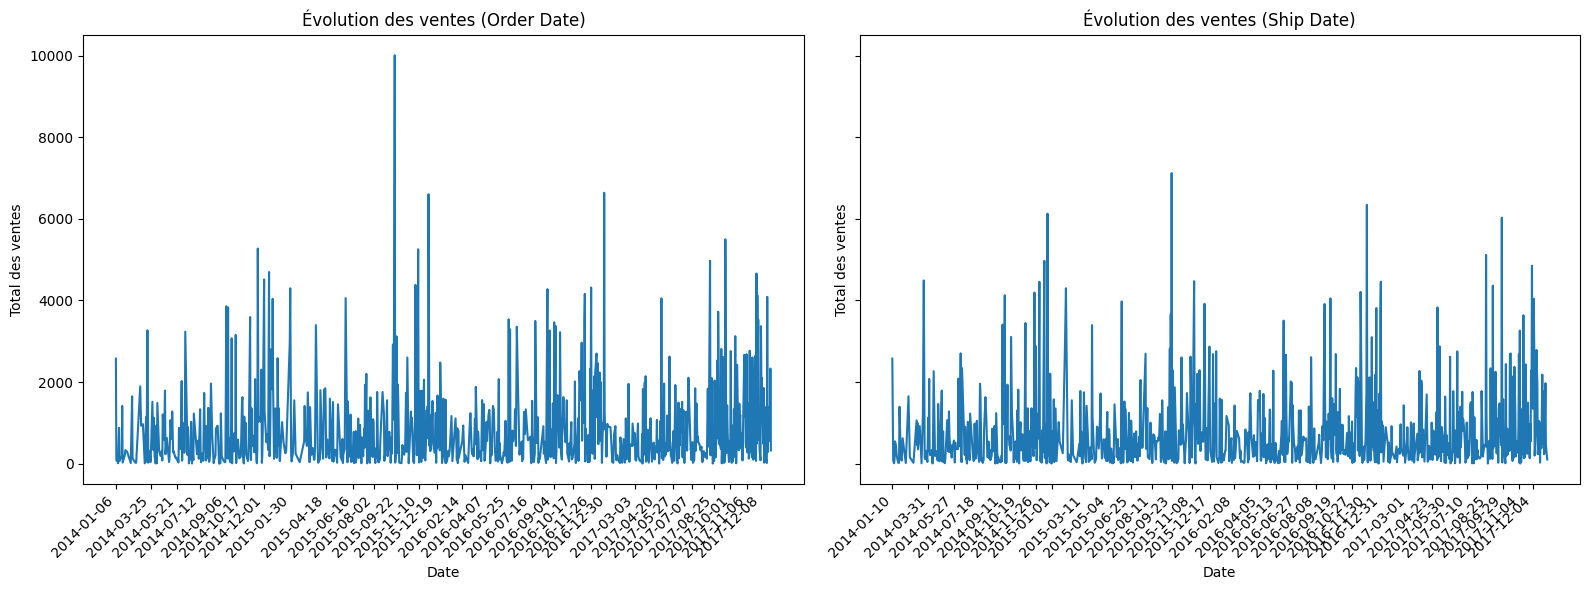

In [11]:
eda.get_plot_for_sales_day_by_day(df, ["Order Date", "Ship Date"])

On constate une saisonnalité

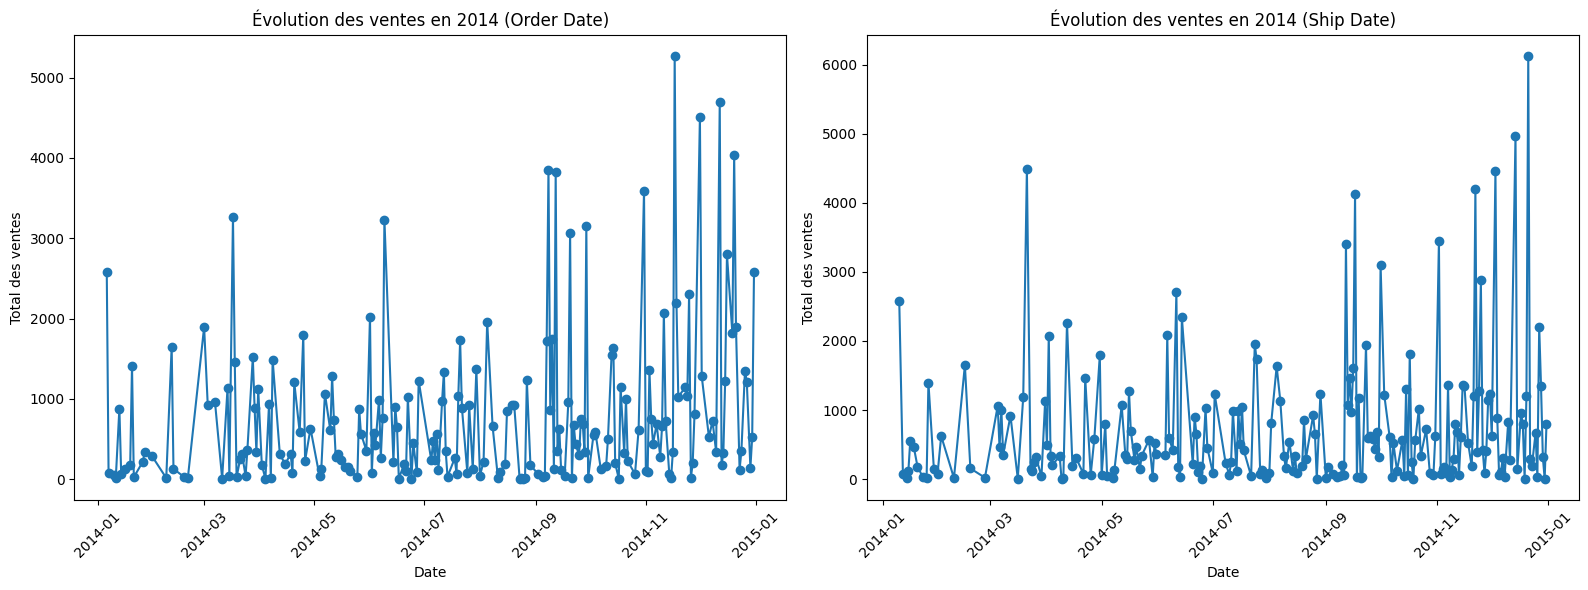

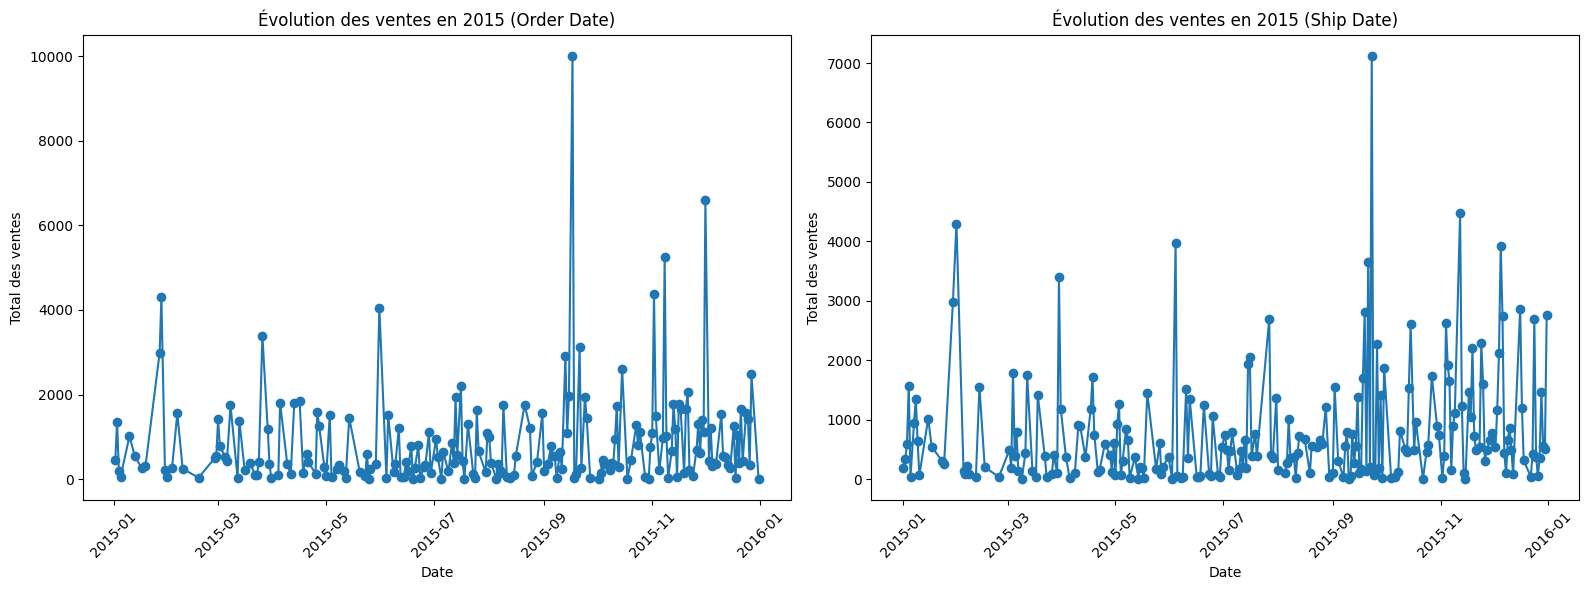

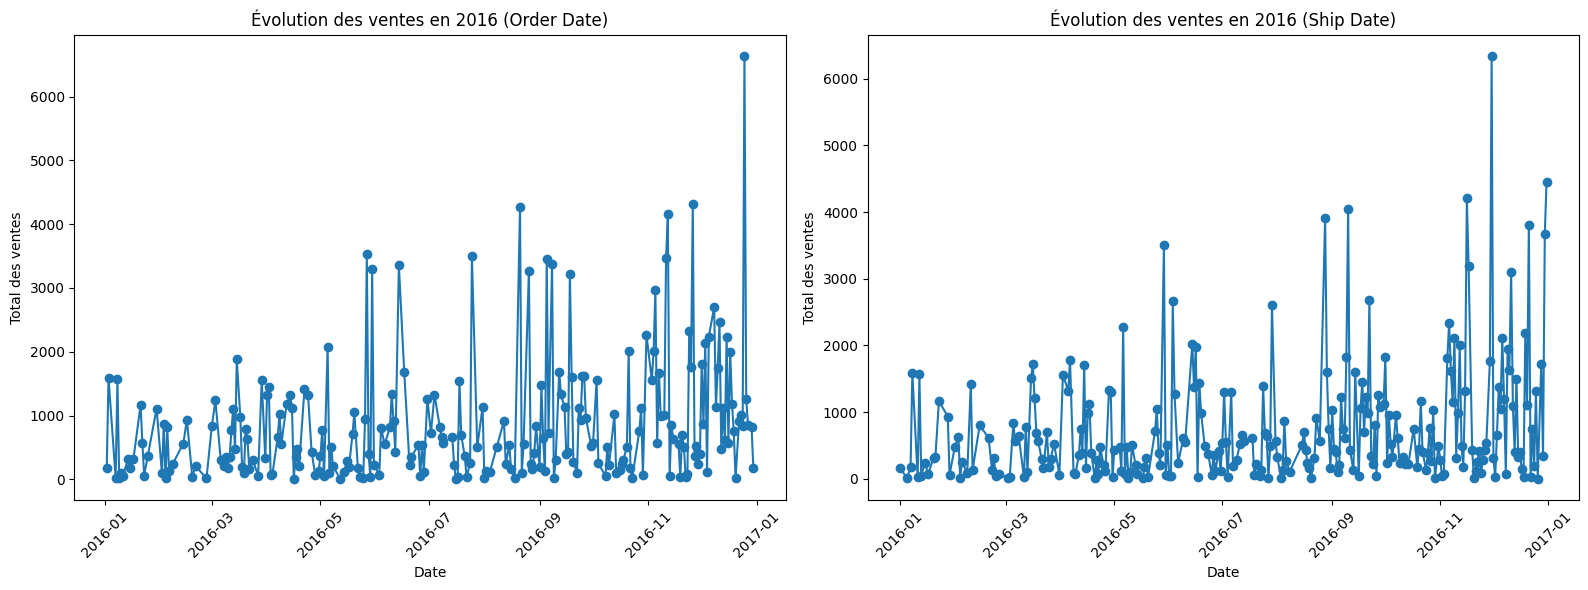

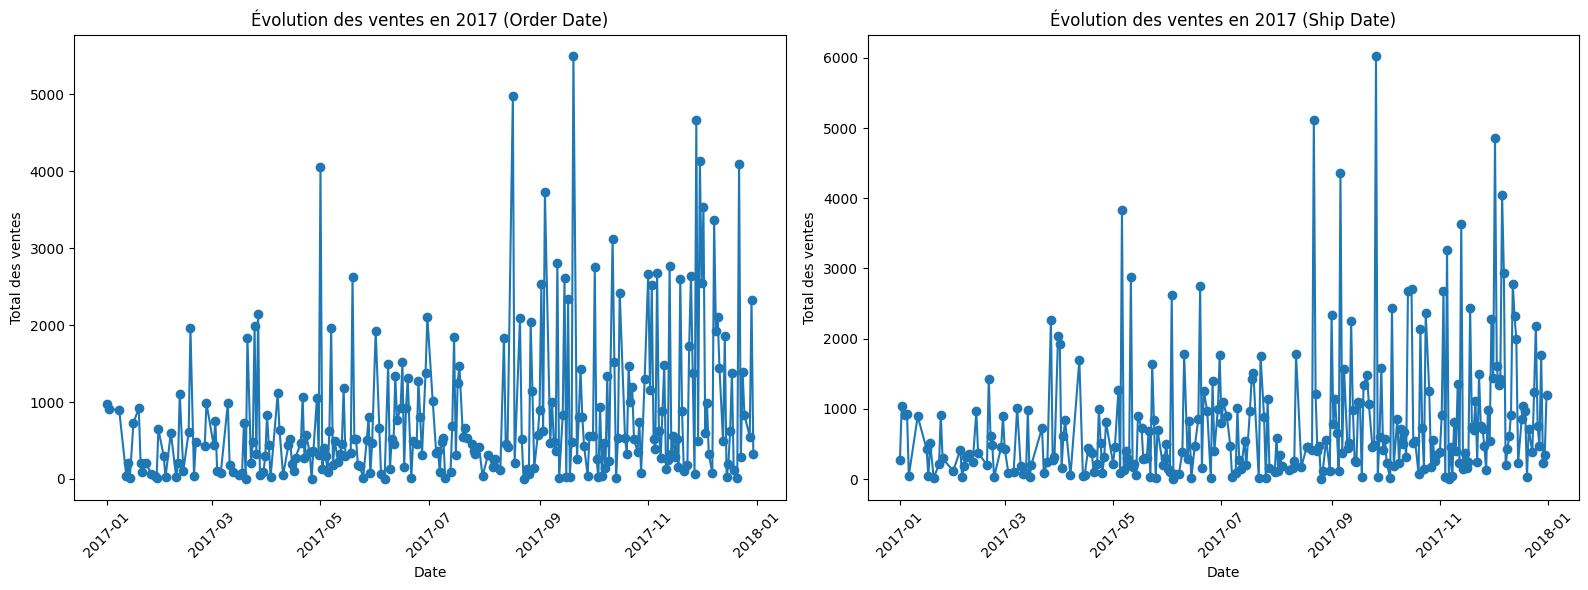

In [12]:
# Générer les graphiques pour chaque année
for year in [2014, 2015, 2016, 2017]:
    eda.get_plot_for_sales_every_year(df, year, ["Order Date", "Ship Date"])


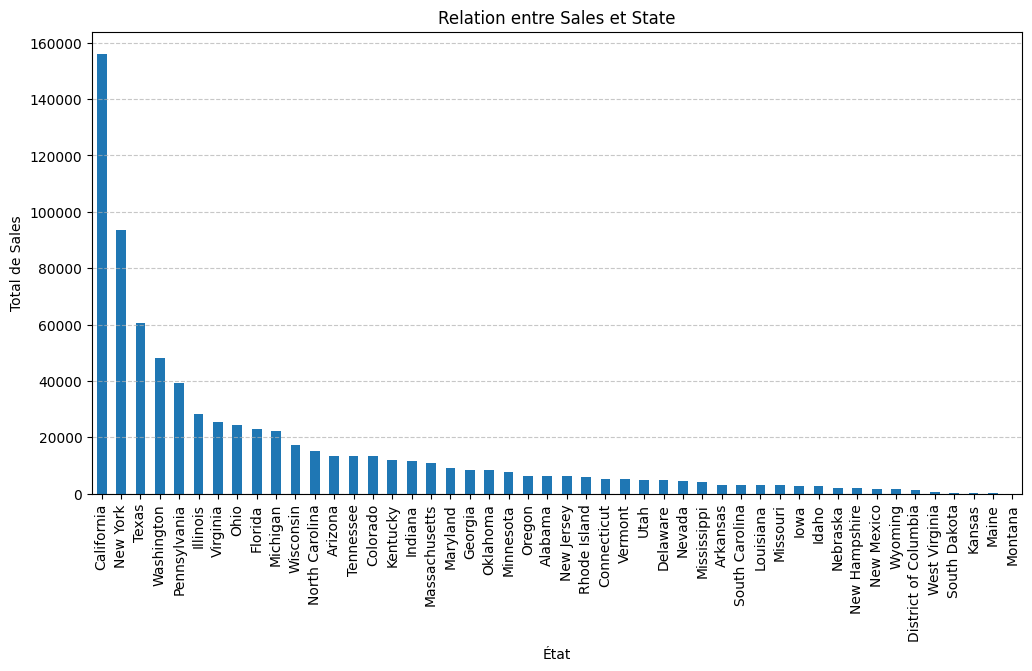

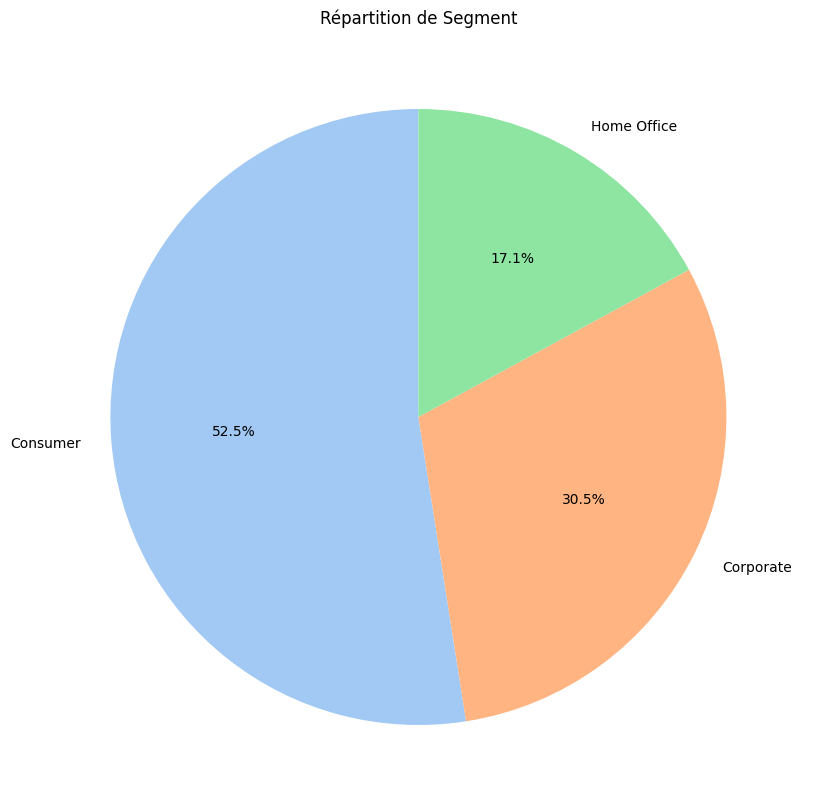

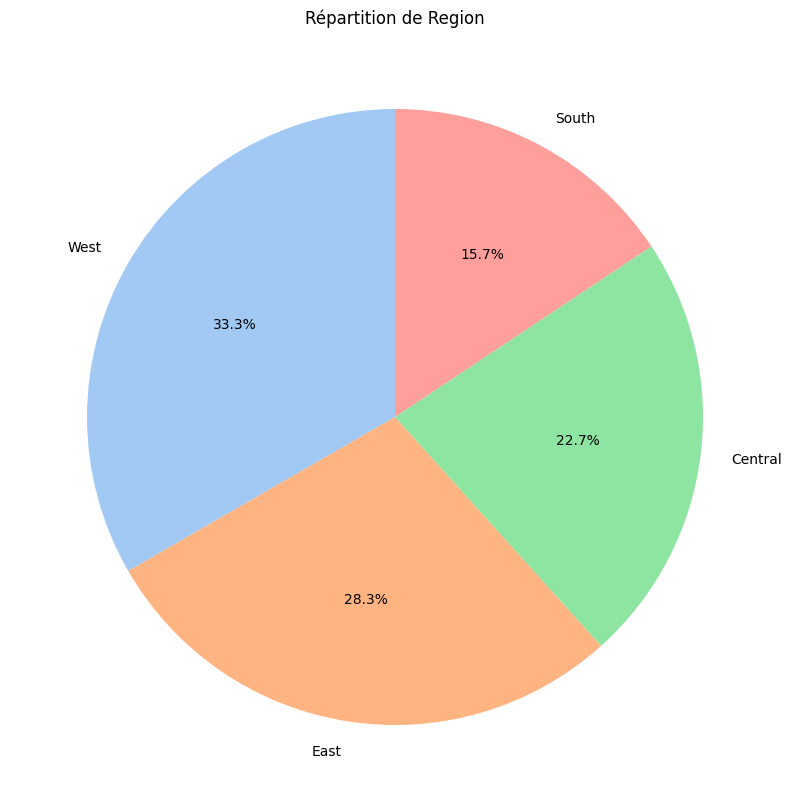

In [13]:
eda.plot_bar_chart(df, "Sales")
eda.plot_pie_chart(df, "Segment")
eda.plot_pie_chart(df, "Region")

/Users/SamuelLP/Desktop/git/test-moovai/scripts/eda.py:275: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_counts.index, y=ship_mode_counts.values, palette="pastel")


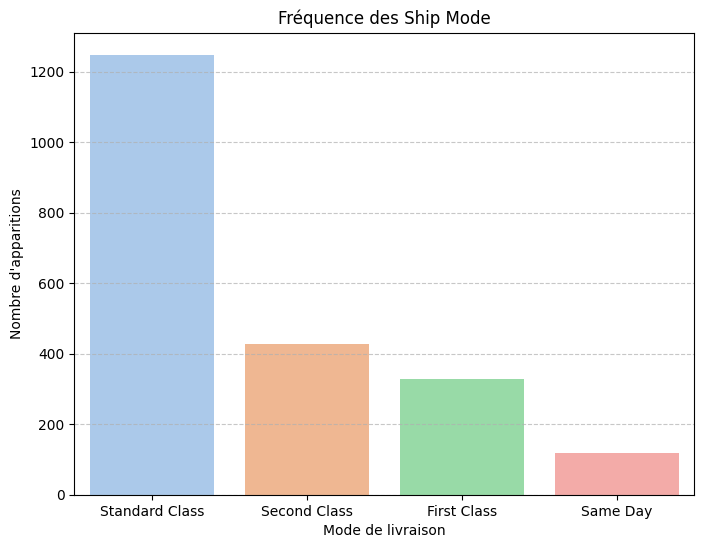

In [14]:
eda.plot_ship_mode_frequency(df)

/Users/SamuelLP/Desktop/git/test-moovai/scripts/eda.py:297: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Sales", y="Discount", data=df, palette="pastel", alpha=0.6)


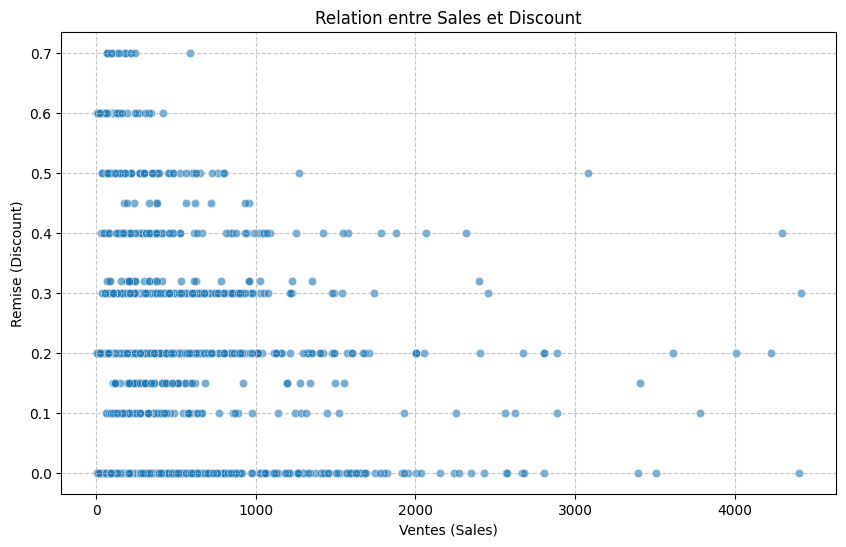

/Users/SamuelLP/Desktop/git/test-moovai/scripts/eda.py:319: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Discount", y="Profit", data=df, palette="pastel", alpha=0.6)


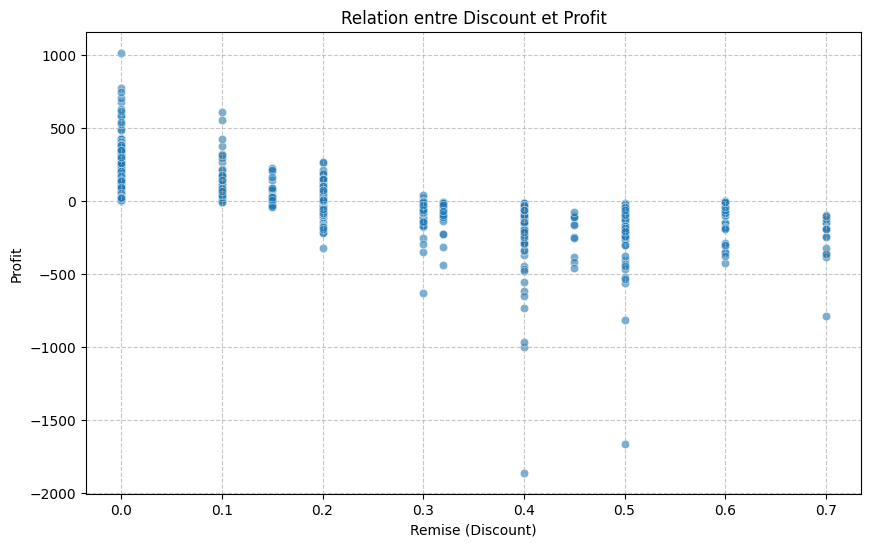

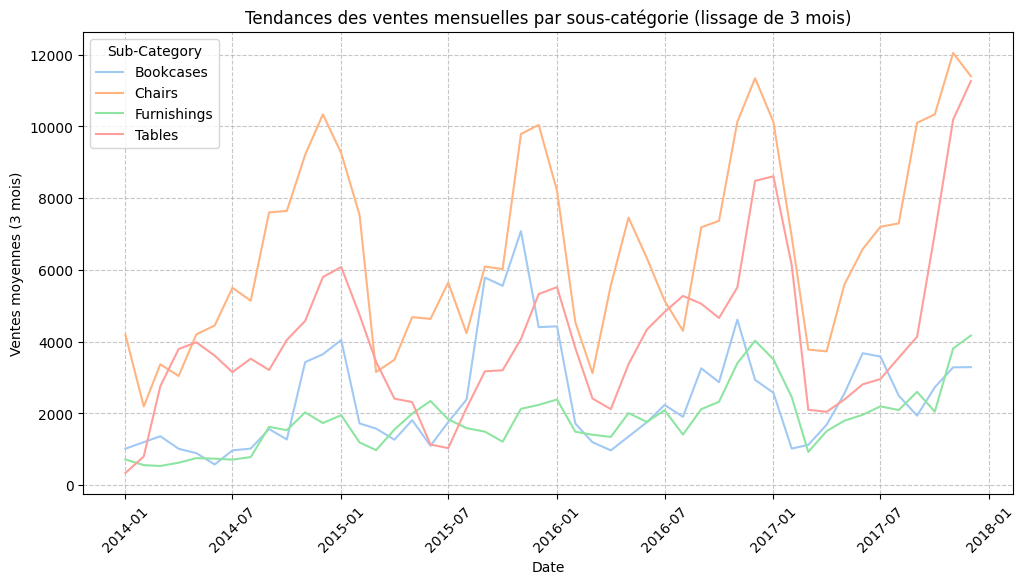

In [15]:
eda.plot_sales_vs_discount(df)
eda.plot_discount_vs_profit(df)
eda.plot_monthly_sales_trend(df, window=3)

Nous pouvons conclure :
- Profit semble avoir des outliers
- des variables ont une seule catégories, nous pouvons les retirer
- il semble y avoir une saisonnalité des ventes
- un grand discount va entrainer une baisse du profit
- il y a un déséquilibre important des commandes entre les Etats, nous nous focaliserons sur les régions à la place
- Au vu de la saisonnalité il sera intéressant de créer des variables de saison

# Cleaning

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014-06
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,2014-06


In [17]:
DATE_COLUMN = ["Order Date", "Ship Date"]
ID_COLUMNS = ["Order ID", "Product ID", "Customer ID"]
NUMERIC_COLUMNS = ['Sales', 'Quantity', 'Profit']
COLS_TO_DROP = ["Order ID", "Product ID", "Row ID","Customer ID","Customer Name", "City",
                "Country", "Postal Code", "Category", "Product Name", "Profit"]


df = data_cleaning.cleaning(df=df,
                       cols_to_drop=COLS_TO_DROP,
                       date_column=DATE_COLUMN,
                       id_columns=ID_COLUMNS,
                       numeric_cols=NUMERIC_COLUMNS)

cleaning data...
passage des dates en format datetime...
aggregation des doublons...
suppression des colonnes inutiles...
cleaning terminé ✅


In [18]:
df.head()

,Sales,Quantity,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Discount,Order Month
0,502.488,3,2014-07-08,2014-07-12,Standard Class,Corporate,California,West,Tables,0.2,2014-07
1,317.058,3,2014-04-18,2014-04-22,Standard Class,Consumer,Texas,Central,Chairs,0.3,2014-04
2,29.460,6,2014-12-16,2014-12-18,Second Class,Consumer,Virginia,South,Furnishings,0.0,2014-12
3,591.320,4,2014-10-21,2014-10-26,Standard Class,Corporate,Virginia,South,Tables,0.0,2014-10
4,59.920,4,2014-04-20,2014-04-25,Standard Class,Consumer,California,West,Furnishings,0.0,2014-04


# Feature engineering

In [19]:
df = feature_engineering.get_feature_engineering(df, lag=30)

création des featues liées à la date...
Creation de la variable Season...
Création de la variable Shipping Delay...
one hot encoding des variables catégorielles...
leave one out target encoding...
ajout de lag de 30 jours sur les Sales...
feature engineering terminé ✅


In [20]:
df.to_csv("df_ready_for_model.csv", index=False)

# Modélisation

## Modélisation naïve : ARIMA(1, 1, 1)

In [21]:
HORIZONS = [30, 90, 365]

RMSE de ARIMA pour un forecast à 30 jours: 293.47
RMSE de ARIMA pour un forecast à 90 jours: 352.37
RMSE de ARIMA pour un forecast à 365 jours: 438.56


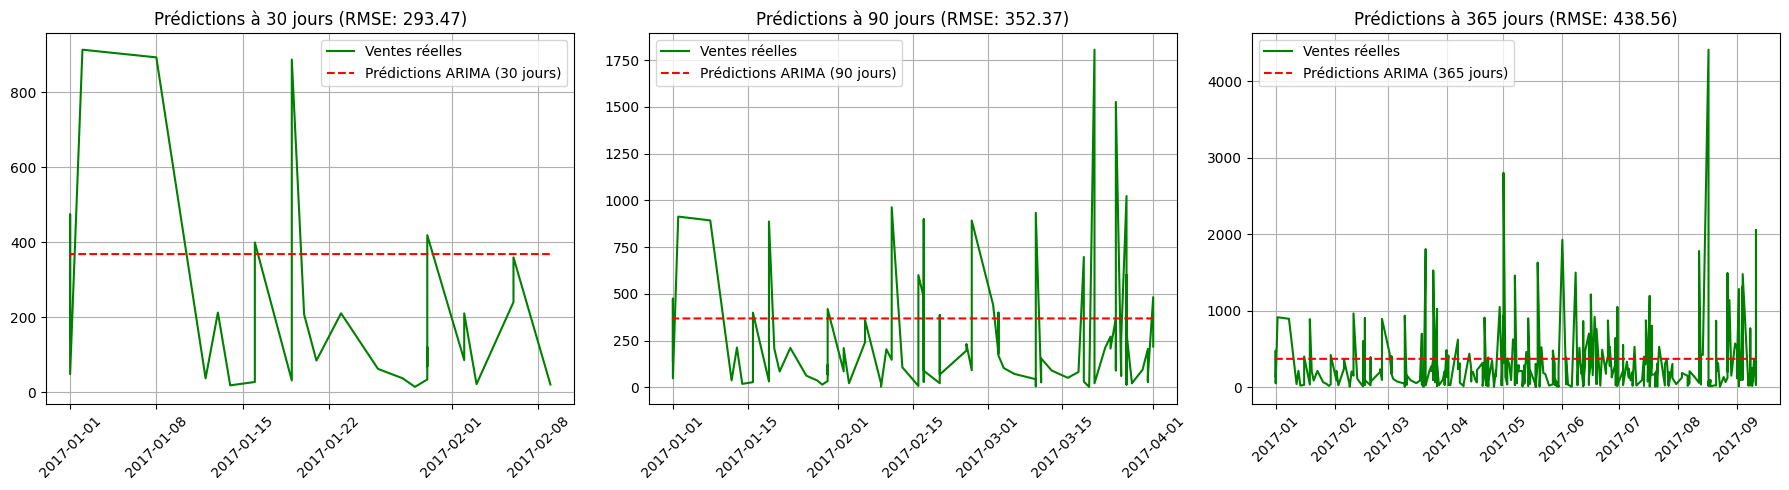

In [22]:
modelisation.modelisation_arima(df=df, horizons=HORIZONS)

## Modélisation ML : XGBoost

RMSE du XGBoost pour un horizon de 30 jours: 229.53
RMSE du XGBoost pour un horizon de 90 jours: 225.43
RMSE du XGBoost pour un horizon de 365 jours: 312.18


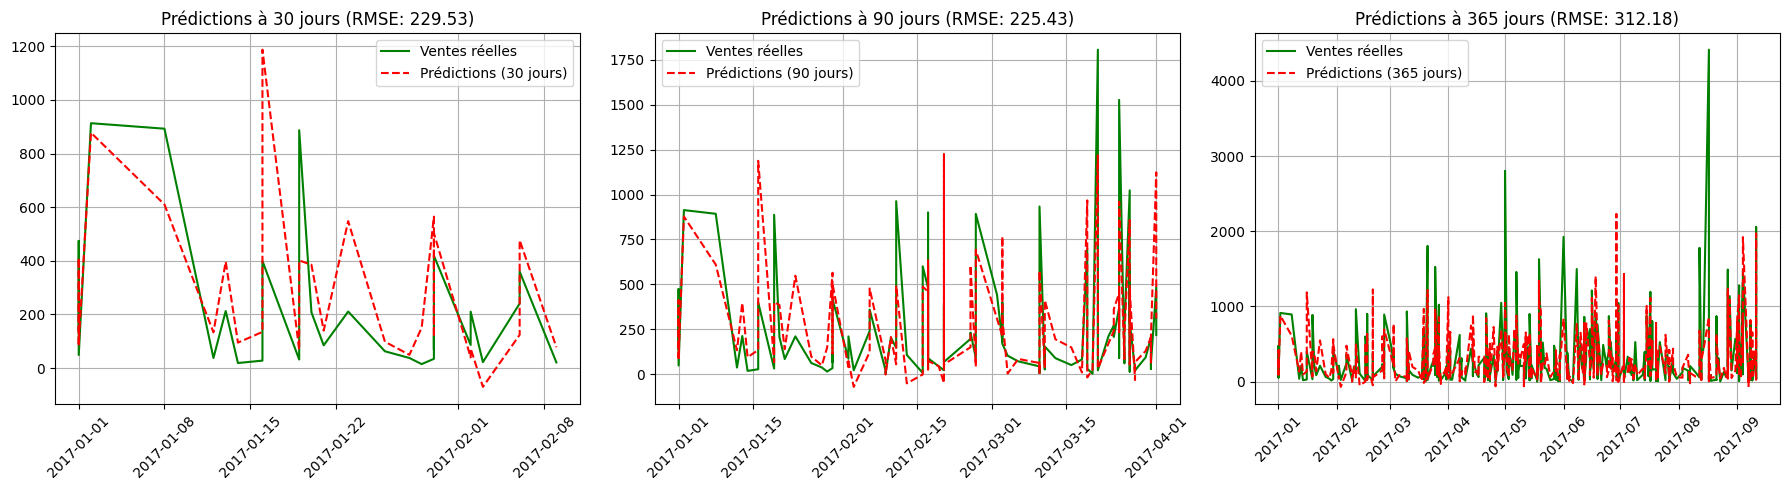

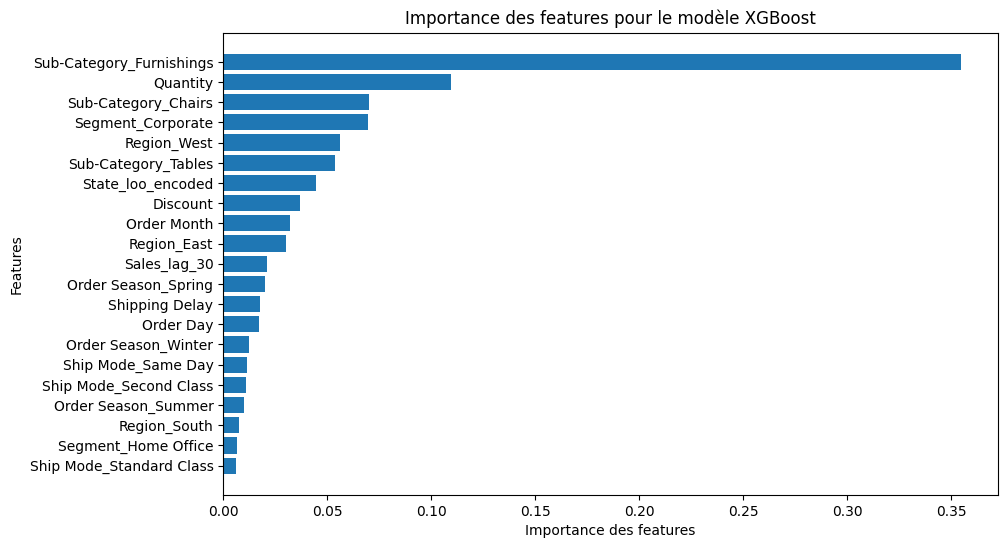

In [23]:
modelisation.modelisation_xgboost(df=df, horizons=HORIZONS)

# Conclusion de la modélisation

- Un modèle naïf ARIMA(1, 1, 1) montre des performances médiocres, n'arrivant à capturer aucune tendance sur les trois horizons
- Le modèle de ML utilisé (XGBoost) montre quand à lui des performances bien meilleures, bien qu'imparfaites. Il tend à capturer une légère tendance sur 30 jours, bien que cela diminue au fur et à mesure de l'agrandissement de nos horizons. Cependant, cela reste bien meilleur que notre modèle naïf.